In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

In [2]:
team_df = pd.read_csv("../data/team_stats.csv")
player_df = pd.read_csv("../data/player_stats.csv")

In [3]:
team_df.head()

,team,opponent,division,phase,sets_won,sets_played,sets_scores,team_attacks,team_blocks,team_aces,opp_errors,team_total_points,team_digs,team_receptions,team_sets,team_err_committed,opp_points
0,Bulgaria,Serbia,Men,Pool,1,4,"[25, 19, 22, 20]",52,15,3,16,86,56,85,98,28,94
1,Serbia,Bulgaria,Men,Pool,3,4,"[19, 25, 25, 25]",54,4,8,28,94,76,74,105,16,86
2,China,Iran,Men,Pool,1,4,"[15, 25, 22, 15]",44,6,5,22,77,30,78,59,25,94
3,Iran,China,Men,Pool,3,4,"[25, 19, 25, 25]",48,7,14,25,94,39,65,63,22,77
4,Canada,Germany,Men,Pool,0,3,"[19, 20, 28]",37,4,4,22,67,42,62,77,23,80


In [4]:
player_df.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Comparison of actions per set

actions_per_set = team_df.groupby('division')[['sets_played', 'team_attacks', 'team_blocks', 'team_aces', 'team_digs', 'team_receptions', 'team_sets', 'opp_errors']].sum()
actions_per_set

,sets_played,team_attacks,team_blocks,team_aces,team_digs,team_receptions,team_sets,opp_errors
division,,,,,,,,
Men,750,9388,1414,1005,8709,13586,18507,4941
Women,780,10497,1753,767,14022,15303,24976,4076


In [6]:
actions_per_set = actions_per_set.iloc[:,1:].div(actions_per_set['sets_played'], axis=0)
actions_per_set

,team_attacks,team_blocks,team_aces,team_digs,team_receptions,team_sets,opp_errors
division,,,,,,,
Men,12.52,1.89,1.34,11.61,18.11,24.68,6.59
Women,13.46,2.25,0.98,17.98,19.62,32.02,5.23


In [7]:
actions_per_set = actions_per_set.reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
actions_per_set

,division,action,num_per_set
0,Men,team_attacks,12.52
1,Women,team_attacks,13.46
2,Men,team_blocks,1.89
3,Women,team_blocks,2.25
4,Men,team_aces,1.34
5,Women,team_aces,0.98
6,Men,team_digs,11.61
7,Women,team_digs,17.98
8,Men,team_receptions,18.11
9,Women,team_receptions,19.62


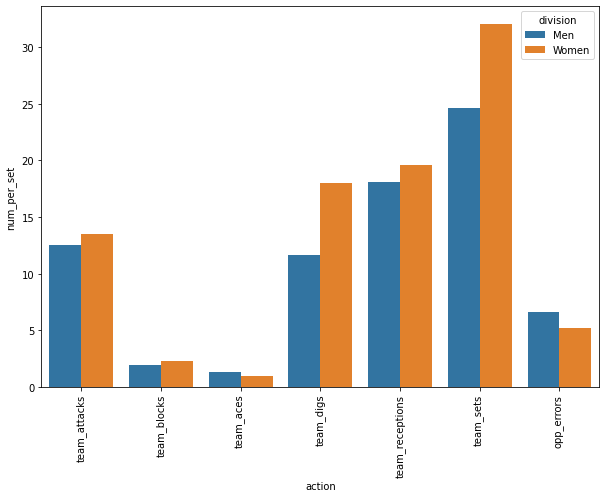

In [8]:
plt.figure(figsize=(10,7))
sns.barplot(data=actions_per_set, x='action', y='num_per_set', hue='division')
plt.xticks(rotation=90);

In [9]:
# We should be getting attempts
player_df.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
player_df.columns

Index(['name', 'nationality', 'position', 'division', 'opponent', 'match_date',
       'phase', 'sets_won', 'sets_played', 'points_scored', 'attack_kills',
       'attack_faults', 'attack_shots', 'attack_total', 'block_kills',
       'block_faults', 'block_rebounds', 'block_total', 'serve_aces',
       'serve_errors', 'serve_attempts', 'serve_total', 'rec_excellents',
       'rec_faults', 'rec_attempts', 'rec_total', 'dig_excellents',
       'dig_faults', 'dig_attempts', 'dig_total', 'set_excellents',
       'set_faults', 'set_stills', 'set_total'],
      dtype='object')

In [11]:
sets_played = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)['sets_played'].first()
sets_played = sets_played.groupby('division').sum()

In [12]:
cols = ['attack_kills', 'attack_total', 'block_kills', 'block_total', 'serve_aces', 'serve_total', 
        'rec_excellents', 'rec_total', 'dig_excellents', 'dig_total', 'set_excellents', 'set_total']
trial_df = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)[cols].sum()
trial_df = trial_df.groupby('division').sum()
trial_df['sets_played'] = sets_played['sets_played']
trial_df

,attack_kills,attack_total,block_kills,block_total,serve_aces,serve_total,rec_excellents,rec_total,dig_excellents,dig_total,set_excellents,set_total,sets_played
division,,,,,,,,,,,,,
Men,9388,18743,1414,7890,1005,16758,3367,13586,5160,8709,5361,18507,750
Women,10497,25768,1753,9050,767,17088,5397,15303,9865,14022,5320,24976,780


In [13]:
trial_df = trial_df.iloc[:,:-1].div(trial_df['sets_played'], axis=0)
trial_df

,attack_kills,attack_total,block_kills,block_total,serve_aces,serve_total,rec_excellents,rec_total,dig_excellents,dig_total,set_excellents,set_total
division,,,,,,,,,,,,
Men,12.52,24.99,1.89,10.52,1.34,22.34,4.49,18.11,6.88,11.61,7.15,24.68
Women,13.46,33.04,2.25,11.60,0.98,21.91,6.92,19.62,12.65,17.98,6.82,32.02


In [14]:
actions_per_set = trial_df.reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
actions_per_set

,division,action,num_per_set
0,Men,attack_kills,12.52
1,Women,attack_kills,13.46
2,Men,attack_total,24.99
3,Women,attack_total,33.04
4,Men,block_kills,1.89
5,Women,block_kills,2.25
6,Men,block_total,10.52
7,Women,block_total,11.60
8,Men,serve_aces,1.34
9,Women,serve_aces,0.98


In [15]:
trial_df1 = trial_df.iloc[:, ::2].reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
trial_df1

,division,action,num_per_set
0,Men,attack_kills,12.52
1,Women,attack_kills,13.46
2,Men,block_kills,1.89
3,Women,block_kills,2.25
4,Men,serve_aces,1.34
5,Women,serve_aces,0.98
6,Men,rec_excellents,4.49
7,Women,rec_excellents,6.92
8,Men,dig_excellents,6.88
9,Women,dig_excellents,12.65


<AxesSubplot:xlabel='action', ylabel='num_per_set'>

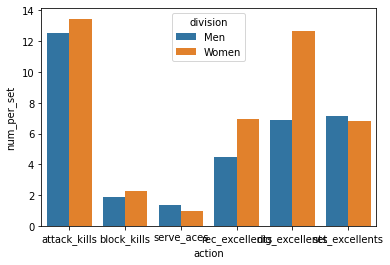

In [16]:
sns.barplot(data=trial_df1, x='action', y='num_per_set', hue='division')

In [17]:
trial_df2 = trial_df.iloc[:, 1::2].reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
trial_df2


,division,action,num_per_set
0,Men,attack_total,24.99
1,Women,attack_total,33.04
2,Men,block_total,10.52
3,Women,block_total,11.60
4,Men,serve_total,22.34
5,Women,serve_total,21.91
6,Men,rec_total,18.11
7,Women,rec_total,19.62
8,Men,dig_total,11.61
9,Women,dig_total,17.98


<AxesSubplot:xlabel='action', ylabel='num_per_set'>

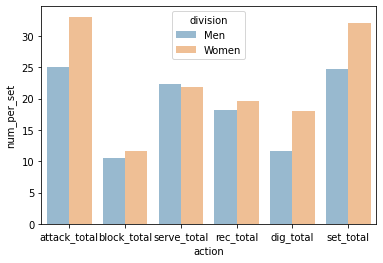

In [18]:
sns.barplot(data=trial_df2, x='action', y='num_per_set', hue='division', alpha=0.5)

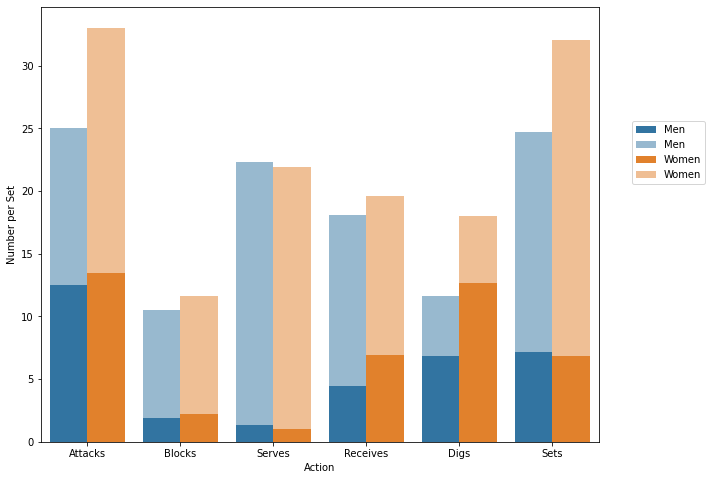

In [19]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(data=trial_df1, x='action', y='num_per_set', hue='division')
ax = sns.barplot(data=trial_df2, x='action', y='num_per_set', hue='division', alpha=0.5)

ax.set_xticklabels(['Attacks', 'Blocks', 'Serves', 'Receives', 'Digs', 'Sets'])

plt.xlabel('Action')
plt.ylabel('Number per Set')


plt.legend()

handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0, 2, 1, 3]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.05, 0.75)) 


plt.show()



In [20]:
trial_df1

,division,action,num_per_set
0,Men,attack_kills,12.52
1,Women,attack_kills,13.46
2,Men,block_kills,1.89
3,Women,block_kills,2.25
4,Men,serve_aces,1.34
5,Women,serve_aces,0.98
6,Men,rec_excellents,4.49
7,Women,rec_excellents,6.92
8,Men,dig_excellents,6.88
9,Women,dig_excellents,12.65


In [21]:
trial_df2

,division,action,num_per_set
0,Men,attack_total,24.99
1,Women,attack_total,33.04
2,Men,block_total,10.52
3,Women,block_total,11.60
4,Men,serve_total,22.34
5,Women,serve_total,21.91
6,Men,rec_total,18.11
7,Women,rec_total,19.62
8,Men,dig_total,11.61
9,Women,dig_total,17.98


In [26]:
trial_df3 = trial_df1.copy()
trial_df4 = trial_df2.copy()
trial_df3['num_per_set'] = 100 * trial_df3['num_per_set'] / trial_df4['num_per_set']
trial_df4['num_per_set'] = 100 * trial_df4['num_per_set'] / trial_df4['num_per_set']
trial_df3

,division,action,num_per_set
0,Men,attack_kills,50.09
1,Women,attack_kills,40.74
2,Men,block_kills,17.92
3,Women,block_kills,19.37
4,Men,serve_aces,6.00
5,Women,serve_aces,4.49
6,Men,rec_excellents,24.78
7,Women,rec_excellents,35.27
8,Men,dig_excellents,59.25
9,Women,dig_excellents,70.35


In [27]:
trial_df4

,division,action,num_per_set
0,Men,attack_total,100.00
1,Women,attack_total,100.00
2,Men,block_total,100.00
3,Women,block_total,100.00
4,Men,serve_total,100.00
5,Women,serve_total,100.00
6,Men,rec_total,100.00
7,Women,rec_total,100.00
8,Men,dig_total,100.00
9,Women,dig_total,100.00


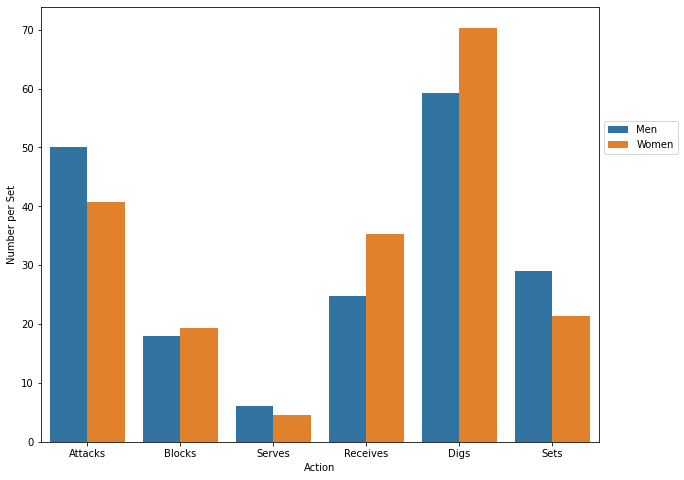

In [28]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(data=trial_df3, x='action', y='num_per_set', hue='division')
# ax = sns.barplot(data=trial_df4, x='action', y='num_per_set', hue='division', alpha=0.5)

ax.set_xticklabels(['Attacks', 'Blocks', 'Serves', 'Receives', 'Digs', 'Sets'])

plt.xlabel('Action')
plt.ylabel('Number per Set')


plt.legend()

#add legend to plot
plt.legend(bbox_to_anchor=(1.15, 0.75)) 


plt.show()


### Error Analysis

Goal: See if there is a difference with serve faults for men's vs women's.

In [29]:
team_df.head()

,team,opponent,division,phase,sets_won,sets_played,sets_scores,team_attacks,team_blocks,team_aces,opp_errors,team_total_points,team_digs,team_receptions,team_sets,team_err_committed,opp_points
0,Bulgaria,Serbia,Men,Pool,1,4,"[25, 19, 22, 20]",52,15,3,16,86,56,85,98,28,94
1,Serbia,Bulgaria,Men,Pool,3,4,"[19, 25, 25, 25]",54,4,8,28,94,76,74,105,16,86
2,China,Iran,Men,Pool,1,4,"[15, 25, 22, 15]",44,6,5,22,77,30,78,59,25,94
3,Iran,China,Men,Pool,3,4,"[25, 19, 25, 25]",48,7,14,25,94,39,65,63,22,77
4,Canada,Germany,Men,Pool,0,3,"[19, 20, 28]",37,4,4,22,67,42,62,77,23,80


In [30]:
player_df.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
player_df.columns

Index(['name', 'nationality', 'position', 'division', 'opponent', 'match_date',
       'phase', 'sets_won', 'sets_played', 'points_scored', 'attack_kills',
       'attack_faults', 'attack_shots', 'attack_total', 'block_kills',
       'block_faults', 'block_rebounds', 'block_total', 'serve_aces',
       'serve_errors', 'serve_attempts', 'serve_total', 'rec_excellents',
       'rec_faults', 'rec_attempts', 'rec_total', 'dig_excellents',
       'dig_faults', 'dig_attempts', 'dig_total', 'set_excellents',
       'set_faults', 'set_stills', 'set_total'],
      dtype='object')

In [45]:
error_df = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)['serve_errors'].sum()
error_df = error_df.merge(team_df[['team', 'division', 'opponent', 'phase', 'team_err_committed', 'sets_played']], left_on=['nationality', 'division', 'opponent', 'phase'], right_on=['team', 'division', 'opponent', 'phase']).drop('team', axis=1)
error_df = error_df.groupby('division').sum()
error_df = error_df.iloc[:,:-1].div(error_df['sets_played'], axis=0)
error_df = error_df.reset_index().melt(id_vars='division', var_name='errors', value_name='err_per_set')
error_df

,division,errors,err_per_set
0,Men,serve_errors,4.22
1,Women,serve_errors,2.23
2,Men,team_err_committed,6.59
3,Women,team_err_committed,5.23


<AxesSubplot:xlabel='division', ylabel='err_per_set'>

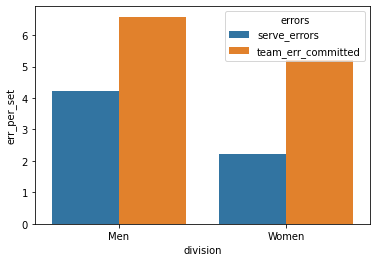

In [47]:
sns.barplot(data=error_df, x='division', y='err_per_set', hue='errors')

In [48]:
error_df = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)['serve_errors'].sum()
error_df = error_df.merge(team_df[['team', 'division', 'opponent', 'phase', 'team_err_committed', 'sets_played']], left_on=['nationality', 'division', 'opponent', 'phase'], right_on=['team', 'division', 'opponent', 'phase']).drop('team', axis=1)
error_df = error_df.groupby('division').sum()
error_df = error_df.iloc[:,:-1].div(error_df['sets_played'], axis=0)
error_df

,serve_errors,team_err_committed
division,,
Men,4.22,6.59
Women,2.23,5.23


In [49]:
error_df['% serve errors'] = 100 * error_df['serve_errors'] / error_df['team_err_committed'] 

In [50]:
error_df

,serve_errors,team_err_committed,% serve errors
division,,,
Men,4.22,6.59,64.12
Women,2.23,5.23,42.59
